## Import libraries

In [78]:
import pandas as pd 
import numpy as np 
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Connect  by SQL

In [79]:
conn_str = (
	'Driver={ODBC Driver 17 for SQL Server};'
	'Server=DESKTOP-HOTEM9J;'
	'Database=DataAnalysis;'
	'Trusted_Connection=yes;'
)
conn = pyodbc.connect(conn_str)

In [80]:
query ="SELECT * FROM shopping_trends"
df = pd.read_sql(query,conn)
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [82]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Clean Data

In [83]:
df.duplicated().sum()

0

In [84]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [85]:
'''''
categorical_columns = [
    'Gender',
    'Item_Purchased',
    'Category', 
    'Color', 
    'Location', 
    'Season', 
    'Subscription_Status',
    'Frequency_of_Purchases', 
    'Preferred_Payment_Method',
    'Promo_Code_Used', 
    'Size', 
    'Shipping_Type',
    'Payment_Method'
]
df[categorical_columns] = df[categorical_columns].astype('category')
'''''

"''\ncategorical_columns = [\n    'Gender',\n    'Item_Purchased',\n    'Category', \n    'Color', \n    'Location', \n    'Season', \n    'Subscription_Status',\n    'Frequency_of_Purchases', \n    'Preferred_Payment_Method',\n    'Promo_Code_Used', \n    'Size', \n    'Shipping_Type',\n    'Payment_Method'\n]\ndf[categorical_columns] = df[categorical_columns].astype('category')\n"

In [86]:
df['Subscription_Status'] = df['Subscription_Status'].map({'Yes': True, 'No': False})
df['Promo_Code_Used'] = df['Promo_Code_Used'].map({'Yes': True, 'No': False})
df['Discount_Applied'] = df['Discount_Applied'].map({'Yes': True, 'No': False})


In [87]:
'''''
bool_columns = [
    'Promo_Code_Used', 
    'Subscription_Status',
    'Discount_Applied'
]
df[bool_columns] = df[bool_columns].astype('bool')
'''''

"''\nbool_columns = [\n    'Promo_Code_Used', \n    'Subscription_Status',\n    'Discount_Applied'\n]\ndf[bool_columns] = df[bool_columns].astype('bool')\n"

In [88]:
df['Subscription_Status'].value_counts()

Subscription_Status
False    2847
True     1053
Name: count, dtype: int64

## Exploratory Data Analysis - EDA

In [89]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [90]:
df['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [91]:
df.groupby('Age')['Purchase_Amount_USD'].mean()

Age
18    59.985507
19    61.000000
20    55.225806
21    64.101449
22    60.772727
23    56.746479
24    63.102941
25    63.200000
26    61.043478
27    53.734940
28    64.607595
29    59.197368
30    61.605634
31    61.569620
32    58.487805
33    62.857143
34    55.279412
35    59.916667
36    60.959459
37    61.519481
38    59.557143
39    59.661765
40    55.916667
41    61.418605
42    54.462500
43    59.468354
44    64.941176
45    56.736111
46    56.815789
47    56.605634
48    52.588235
49    66.095238
50    59.397590
51    63.902778
52    58.287671
53    67.885714
54    63.638554
55    59.369863
56    58.013514
57    59.770115
58    55.814815
59    57.973333
60    57.384615
61    64.184615
62    57.939759
63    60.253333
64    57.123288
65    63.750000
66    57.253521
67    60.333333
68    57.160000
69    62.318182
70    56.865672
Name: Purchase_Amount_USD, dtype: float64

In [92]:
df.groupby('Age')['Previous_Purchases'].mean()

Age
18    21.028986
19    24.481481
20    23.258065
21    23.913043
22    26.636364
23    25.070423
24    25.132353
25    26.976471
26    23.869565
27    25.036145
28    24.316456
29    25.921053
30    26.323944
31    24.278481
32    25.573171
33    22.666667
34    24.720588
35    24.486111
36    25.594595
37    25.805195
38    25.014286
39    23.867647
40    27.694444
41    24.976744
42    28.100000
43    22.962025
44    26.470588
45    21.388889
46    24.605263
47    22.309859
48    24.235294
49    26.630952
50    23.759036
51    26.402778
52    28.767123
53    26.142857
54    24.843373
55    26.534247
56    27.013514
57    28.666667
58    25.592593
59    24.520000
60    26.153846
61    26.815385
62    25.240964
63    23.840000
64    26.630137
65    27.583333
66    26.718310
67    26.500000
68    26.720000
69    26.227273
70    24.507463
Name: Previous_Purchases, dtype: float64

In [93]:
df.groupby('Item_Purchased')['Age'].mean()

Item_Purchased
Backpack      42.895105
Belt          42.440994
Blouse        44.286550
Boots         44.847222
Coat          43.217391
Dress         44.602410
Gloves        43.071429
Handbag       46.052288
Hat           43.551948
Hoodie        44.874172
Jacket        45.392638
Jeans         43.725806
Jewelry       46.292398
Pants         43.502924
Sandals       44.156250
Scarf         44.324841
Shirt         41.994083
Shoes         46.126667
Shorts        43.420382
Skirt         44.284810
Sneakers      42.613793
Socks         44.792453
Sunglasses    44.801242
Sweater       43.335366
T-shirt       42.836735
Name: Age, dtype: float64

In [94]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

In [95]:
df.groupby(['Age','Category']).size().unstack()

Category,Accessories,Clothing,Footwear,Outerwear
Age,,,,
18,18,33,8,10
19,25,36,12,8
20,16,35,8,3
21,20,35,9,5
22,25,29,6,6
23,19,29,14,9
24,19,39,4,6
25,30,33,18,4
26,24,27,10,8


In [96]:
df.groupby('Gender')['Previous_Purchases'].mean()

Gender
Female    24.596154
Male      25.707014
Name: Previous_Purchases, dtype: float64

In [97]:
df.groupby('Location')['Customer_ID'].count().sort_values(ascending=False)

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nevada            87
Nebraska          87
New York          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
New Mexico        81
West Virginia     81
Missouri          81
Mississippi       80
Georgia           79
Arkansas          79
Indiana           79
Kentucky          79
North Carolina    78
Connecticut       78
Ohio              77
Tennessee         77
Texas             77
Virginia          77
Maine             77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Massachusetts     72
Alaska            72
New Hampshire     71
Utah              71
Wyoming           71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

In [98]:
df.groupby('Location')['Previous_Purchases'].mean().sort_values(ascending=False)

Location
Hawaii            29.169231
Arizona           28.369231
Wyoming           28.239437
Missouri          28.148148
Alaska            28.097222
Iowa              27.608696
Alabama           27.449438
Pennsylvania      27.418919
Utah              27.169014
New Hampshire     27.098592
Arkansas          27.063291
Michigan          26.945205
Illinois          26.597826
Maryland          26.534884
Kentucky          26.417722
Minnesota         26.215909
Florida           26.132353
New Mexico        26.037037
Nevada            26.034483
Mississippi       26.012500
South Carolina    26.000000
Tennessee         25.961039
Indiana           25.822785
Oregon            25.513514
Montana           25.270833
Ohio              25.142857
Georgia           25.075949
North Carolina    24.769231
Nebraska          24.758621
Washington        24.698630
Delaware          24.627907
Vermont           24.600000
South Dakota      24.600000
California        24.494737
New York          24.241379
Idaho      

In [99]:
correlation = df['Review_Rating'].corr(df['Purchase_Amount_USD']).round(2)
correlation

0.03

In [100]:
df.groupby('Season')['Purchase_Amount_USD'].mean().sort_values(ascending=False)

Season
Fall      61.556923
Winter    60.357364
Spring    58.737738
Summer    58.405236
Name: Purchase_Amount_USD, dtype: float64

In [101]:
df.groupby('Season')['Previous_Purchases'].mean().sort_values(ascending=False)

Season
Winter    25.920700
Summer    25.408377
Spring    25.116116
Fall      24.970256
Name: Previous_Purchases, dtype: float64

In [102]:
df['Discount_Applied_Num'] = df['Discount_Applied']
df.groupby('Season')['Discount_Applied_Num'].sum().sort_values(ascending=False)

Season
Spring    440
Summer    423
Winter    417
Fall      397
Name: Discount_Applied_Num, dtype: int64

In [103]:
df.groupby('Subscription_Status')['Purchase_Amount_USD'].mean()

Subscription_Status
False    59.865121
True     59.491928
Name: Purchase_Amount_USD, dtype: float64

In [104]:
pd.crosstab(df['Subscription_Status'], df['Preferred_Payment_Method'])

Preferred_Payment_Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Subscription_Status,,,,,,
False,455,497,492,446,497,460
True,157,173,179,190,180,174


In [105]:
df.groupby('Subscription_Status')['Previous_Purchases'].mean()

Subscription_Status
False    25.080436
True     26.084520
Name: Previous_Purchases, dtype: float64

In [106]:
df['Subscription_Status'].value_counts(normalize=True)*100

Subscription_Status
False    73.0
True     27.0
Name: proportion, dtype: float64

In [107]:
df['Payment_Method'].value_counts()

Payment_Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

In [108]:
df.groupby('Payment_Method')['Purchase_Amount_USD'].sum().sort_values(ascending=False)

Payment_Method
Credit Card      42567
Venmo            39991
Cash             38833
PayPal           37449
Bank Transfer    37123
Debit Card       37118
Name: Purchase_Amount_USD, dtype: int64

In [109]:
pd.crosstab(df['Location'], df['Payment_Method'])

Payment_Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Location,,,,,,
Alabama,22,12,14,10,15,16
Alaska,12,13,12,13,8,14
Arizona,11,12,10,13,9,10
Arkansas,12,12,13,16,15,11
California,18,18,15,15,13,16
Colorado,12,17,8,17,11,10
Connecticut,12,11,14,13,11,17
Delaware,10,18,14,11,13,20
Florida,9,11,12,12,9,15


In [110]:
df['Shipping_Type'].value_counts()

Shipping_Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

In [111]:
pd.crosstab(df['Shipping_Type'],df['Payment_Method'])

Payment_Method,Bank Transfer,Cash,Credit Card,Debit Card,PayPal,Venmo
Shipping_Type,,,,,,
2-Day Shipping,101,108,92,107,104,115
Express,109,102,116,107,94,118
Free Shipping,101,119,126,109,116,104
Next Day Air,102,101,108,101,120,116
Standard,116,107,121,104,100,106
Store Pickup,103,111,133,105,104,94


In [112]:
pd.crosstab(df['Shipping_Type'], df['Frequency_of_Purchases'])

Frequency_of_Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Shipping_Type,,,,,,,
2-Day Shipping,84,87,97,89,95,93,82
Express,96,100,99,88,84,85,94
Free Shipping,112,82,101,79,90,101,110
Next Day Air,81,99,109,86,102,87,84
Standard,107,89,75,107,91,98,87
Store Pickup,92,90,103,93,91,99,82


In [113]:
df['Matched']= df['Payment_Method'] == df['Preferred_Payment_Method']
df['Matched'].value_counts()

Matched
False    3283
True      617
Name: count, dtype: int64

In [114]:
pd.crosstab(df['Matched'],df['Shipping_Type'],normalize=True)*100

Shipping_Type,2-Day Shipping,Express,Free Shipping,Next Day Air,Standard,Store Pickup
Matched,,,,,,
False,13.769231,14.076923,14.410256,14.025641,13.948718,13.948718
True,2.307692,2.487179,2.897436,2.589744,2.820513,2.717949


In [115]:
pd.crosstab(df['Matched'], df['Category'], normalize='columns') * 100

Category,Accessories,Clothing,Footwear,Outerwear
Matched,,,,
False,84.677419,83.419689,85.809683,83.333333
True,15.322581,16.580311,14.190317,16.666667


In [116]:
df.groupby('Matched')['Purchase_Amount_USD'].describe()

,count,mean,std,min,25%,50%,75%,max
Matched,,,,,,,,
False,3283.0,59.830947,23.689459,20.0,39.0,60.0,81.0,100.0
True,617.0,59.410049,23.679792,20.0,38.0,60.0,79.0,100.0


In [117]:
pd.crosstab(df['Preferred_Payment_Method'], df['Matched'], normalize='index') * 100

Matched,False,True
Preferred_Payment_Method,,
Bank Transfer,83.169935,16.830065
Cash,82.089552,17.910448
Credit Card,85.692996,14.307004
Debit Card,86.320755,13.679245
PayPal,83.751846,16.248154
Venmo,84.069401,15.930599


In [118]:
pd.crosstab(df['Location'], df['Matched'], normalize='index') * 100

Matched,False,True
Location,,
Alabama,84.269663,15.730337
Alaska,87.500000,12.500000
Arizona,81.538462,18.461538
Arkansas,84.810127,15.189873
California,84.210526,15.789474
Colorado,81.333333,18.666667
Connecticut,84.615385,15.384615
Delaware,81.395349,18.604651
Florida,85.294118,14.705882


In [119]:
pd.crosstab(df['Frequency_of_Purchases'],df['Promo_Code_Used'])

Promo_Code_Used,False,True
Frequency_of_Purchases,,
Annually,334,238
Bi-Weekly,321,226
Every 3 Months,326,258
Fortnightly,299,243
Monthly,316,237
Quarterly,322,241
Weekly,305,234


In [120]:
pd.crosstab(df['Item_Purchased'],df['Category'])

Category,Accessories,Clothing,Footwear,Outerwear
Item_Purchased,,,,
Backpack,143,0,0,0
Belt,161,0,0,0
Blouse,0,171,0,0
Boots,0,0,144,0
Coat,0,0,0,161
Dress,0,166,0,0
Gloves,140,0,0,0
Handbag,153,0,0,0
Hat,154,0,0,0


In [121]:
ct = pd.crosstab(df['Item_Purchased'], df['Category'])
most_demand = ct.idxmax()
most_demand_count = ct.max()
result = pd.DataFrame({
    'Most_Demanded_Item': most_demand,
    'Count': most_demand_count
})

result

,Most_Demanded_Item,Count
Category,,
Accessories,Jewelry,171
Clothing,Blouse,171
Footwear,Sandals,160
Outerwear,Jacket,163


In [122]:
pd.crosstab(df['Size'], df['Category'], normalize='index') * 100

Category,Accessories,Clothing,Footwear,Outerwear
Size,,,,
L,29.154796,45.679012,16.334283,8.831909
M,32.022792,44.330484,15.213675,8.433048
S,34.690799,42.835596,14.027149,8.446456
XL,32.867133,45.221445,15.617716,6.293706


In [123]:
df['Purchase_Amount_USD'].sum()

233081

In [124]:
df['Customer_ID'].nunique()

3900

In [125]:
df['Avg. Purchase per Customer'] = df['Purchase_Amount_USD'] / df['Customer_ID'].nunique()
df['Avg. Purchase per Customer']

0       0.013590
1       0.016410
2       0.018718
3       0.023077
4       0.012564
          ...   
3895    0.007179
3896    0.012564
3897    0.008462
3898    0.019744
3899    0.020769
Name: Avg. Purchase per Customer, Length: 3900, dtype: float64

In [126]:
Avg_Review_Rating = df['Review_Rating'].mean()
Avg_Review_Rating

3.7499487182421563

In [127]:
total_revenue = df["Purchase_Amount_USD"].sum()
total_customers = df["Customer_ID"].nunique()
avg_purchase_per_customer = total_revenue / total_customers
avg_purchase_per_customer 

59.76435897435898

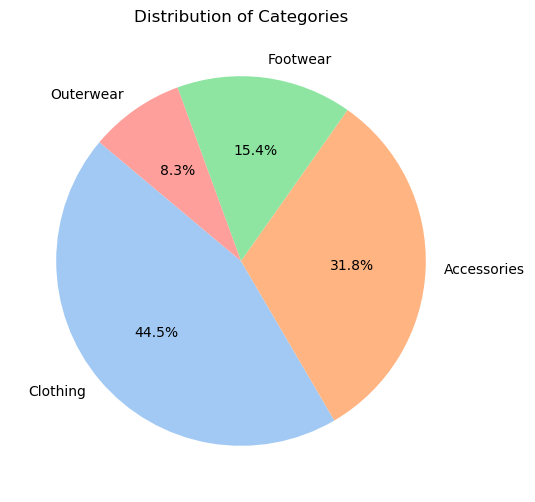

In [128]:
df_unique = df.drop_duplicates(subset=['Customer_ID', 'Category'])
category_counts = df_unique['Category'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'))
plt.title('Distribution of Categories')
plt.show()

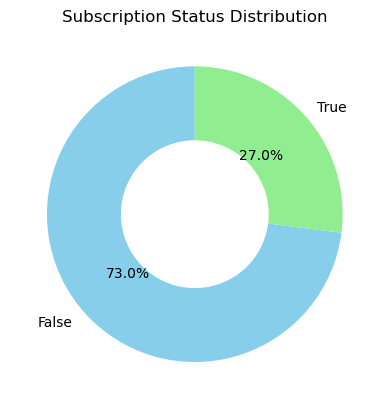

In [129]:
df['Subscription_Status'].value_counts().plot(
	kind='pie', 
	colors=['skyblue', 'lightgreen'], 
	autopct='%1.1f%%',
	startangle=90,
	wedgeprops={'width':0.5}
)
plt.title('Subscription Status Distribution')
plt.ylabel('')
plt.show()

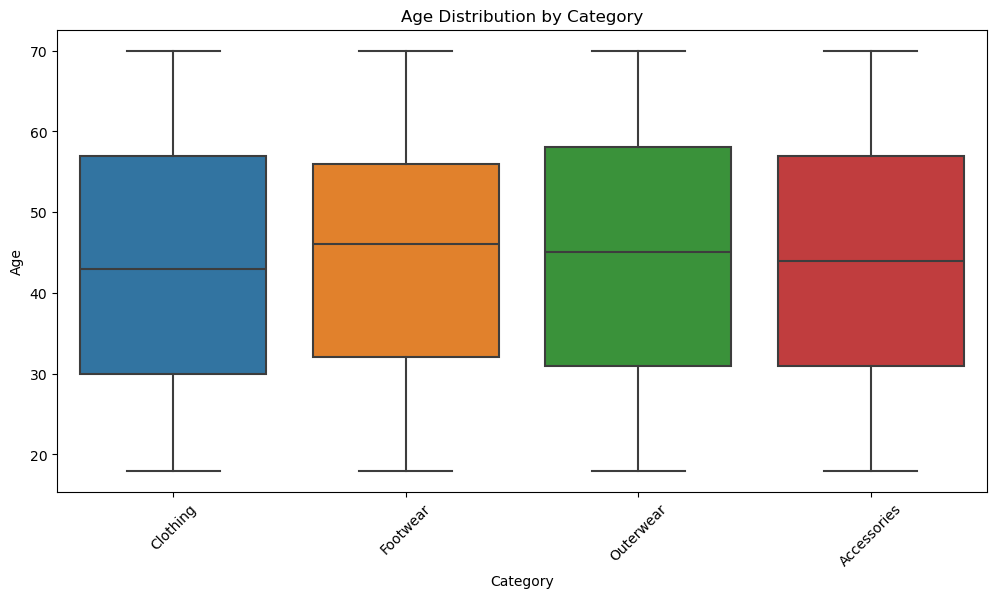

In [130]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Category', y='Age', data=df)
plt.title('Age Distribution by Category')
plt.xticks(rotation=45)
plt.show()


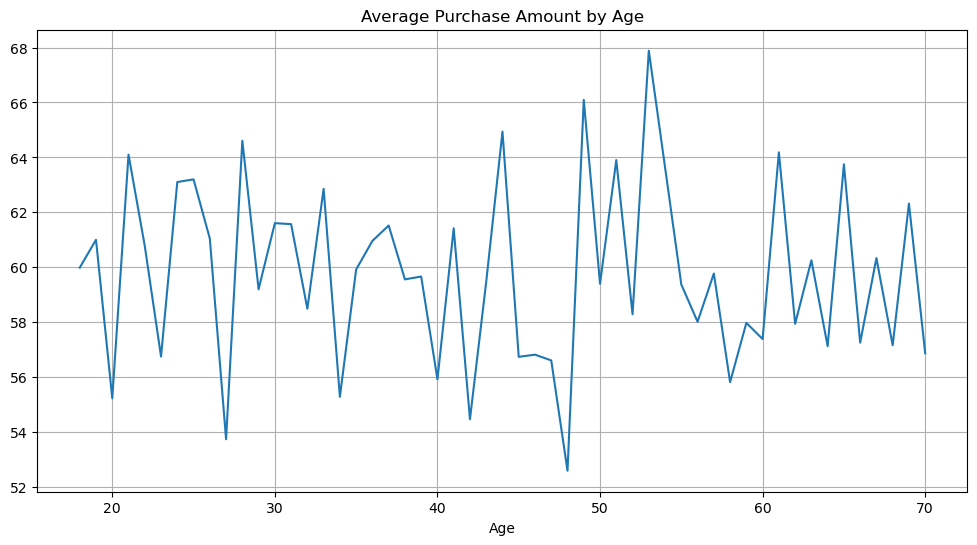

In [131]:
df.groupby('Age')['Purchase_Amount_USD'].mean().plot(kind='line', figsize=(12,6))
plt.title('Average Purchase Amount by Age')
plt.grid(True)

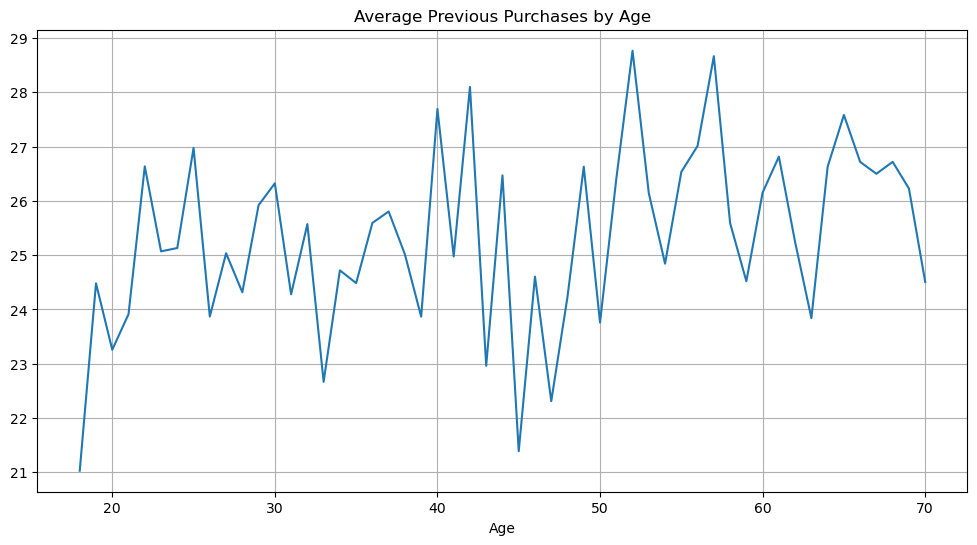

In [132]:
df.groupby('Age')['Previous_Purchases'].mean().plot(kind='line', figsize=(12,6))
plt.title('Average Previous Purchases by Age')
plt.grid(True)

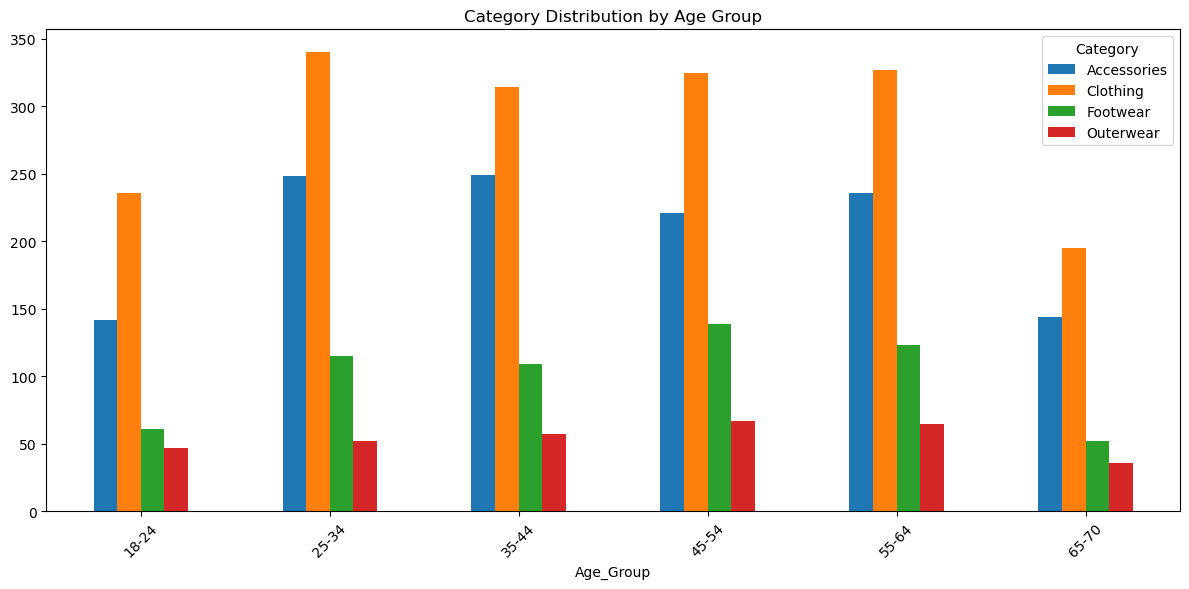

In [134]:
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']
df["Age_Group"] = pd.cut(df['Age'],bins=bins, labels=labels, right=False)
df.groupby(['Age_Group', 'Category']).size().unstack().plot(kind='bar', figsize=(12,6))
plt.title('Category Distribution by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

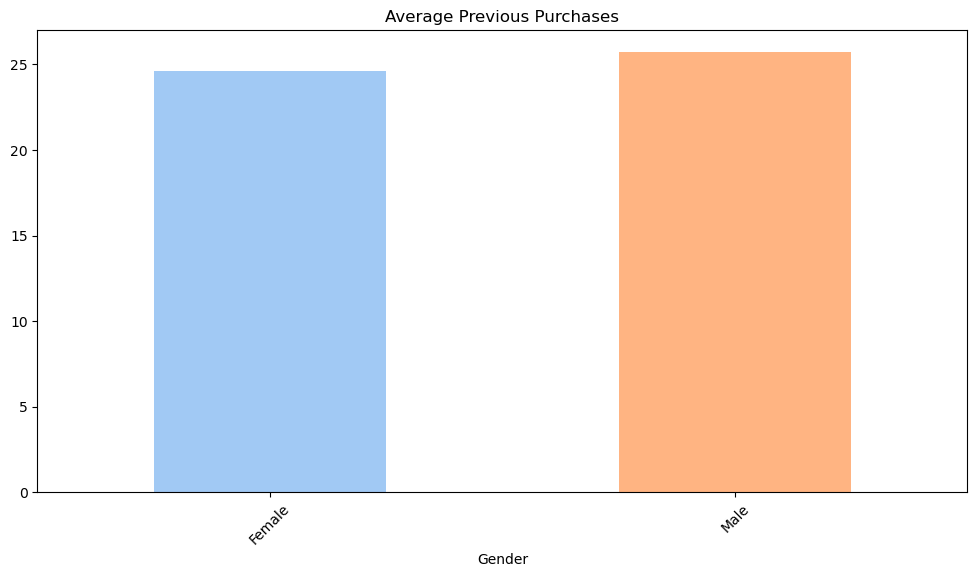

In [ ]:
color = sns.color_palette("pastel")
df.groupby('Gender')['Previous_Purchases'].mean().plot(kind='bar', figsize=(12,6),color=color)
plt.title("Average Previous Purchases")
plt.xticks(rotation=45)
plt.show()

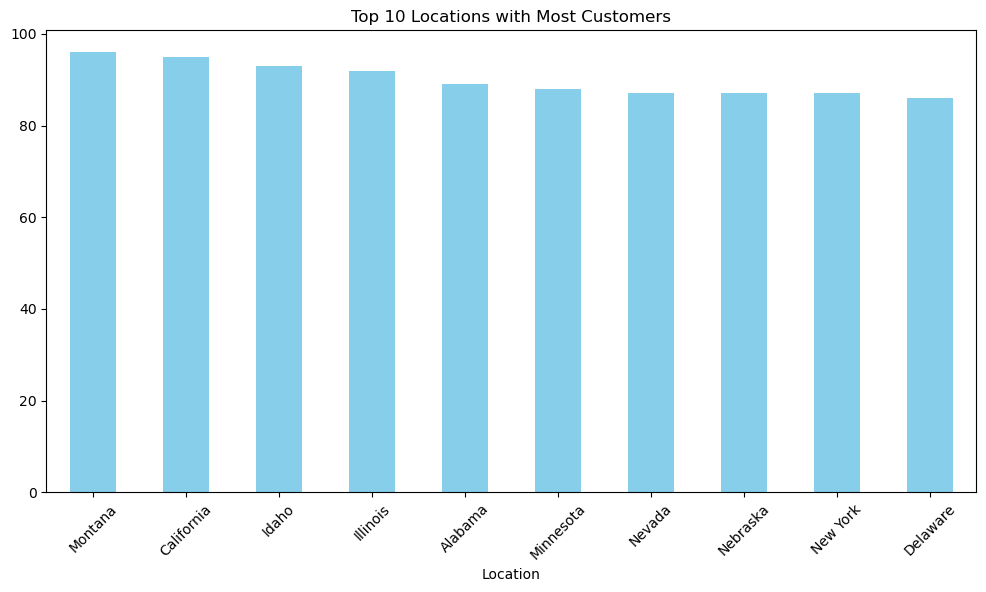

In [ ]:
df.groupby('Location')['Customer_ID'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='skyblue')
plt.title('Top 10 Locations with Most Customers')
plt.xticks(rotation=45)
plt.show()

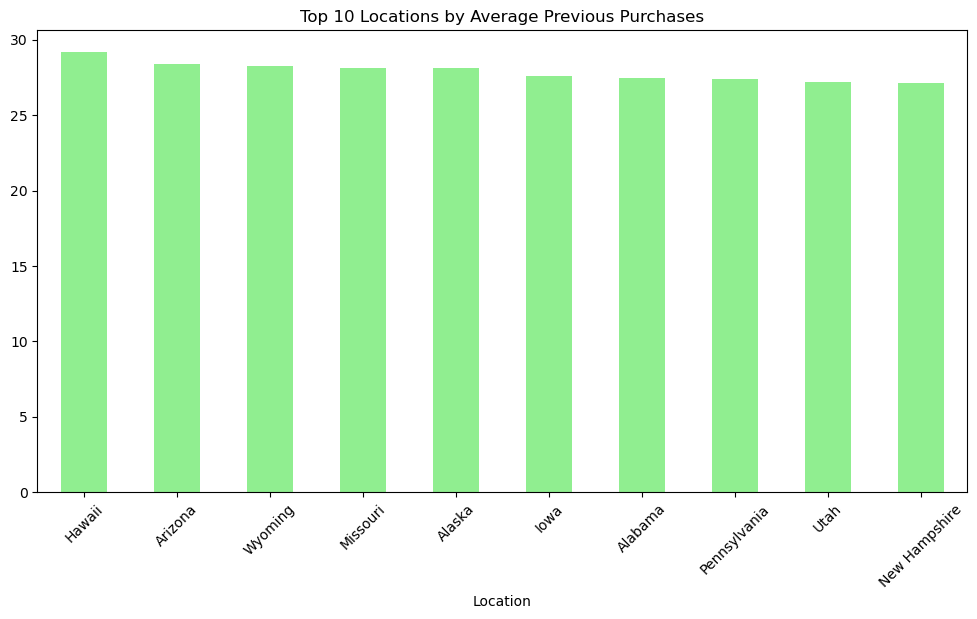

In [ ]:
df.groupby('Location')['Previous_Purchases'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6),color='lightgreen')
plt.title('Top 10 Locations by Average Previous Purchases')
plt.xticks(rotation=45)
plt.show()

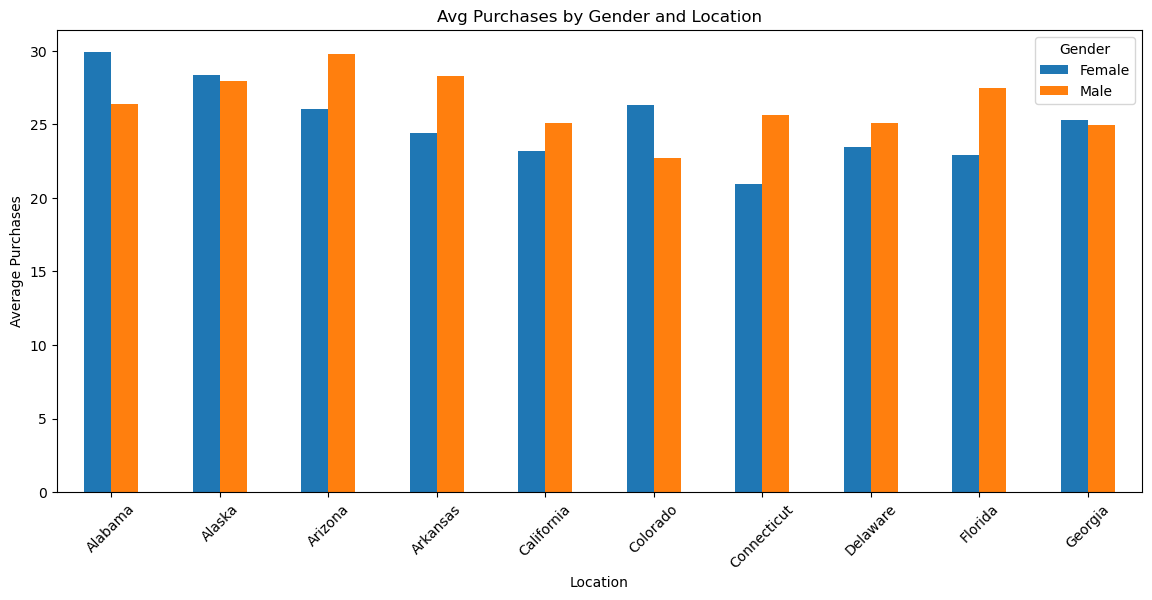

In [ ]:
df.groupby(['Location', 'Gender'])['Previous_Purchases'].mean().unstack().head(10).plot(kind='bar', figsize=(14,6))
plt.title("Avg Purchases by Gender and Location")
plt.ylabel("Average Purchases")
plt.xticks(rotation=45)
plt.show()

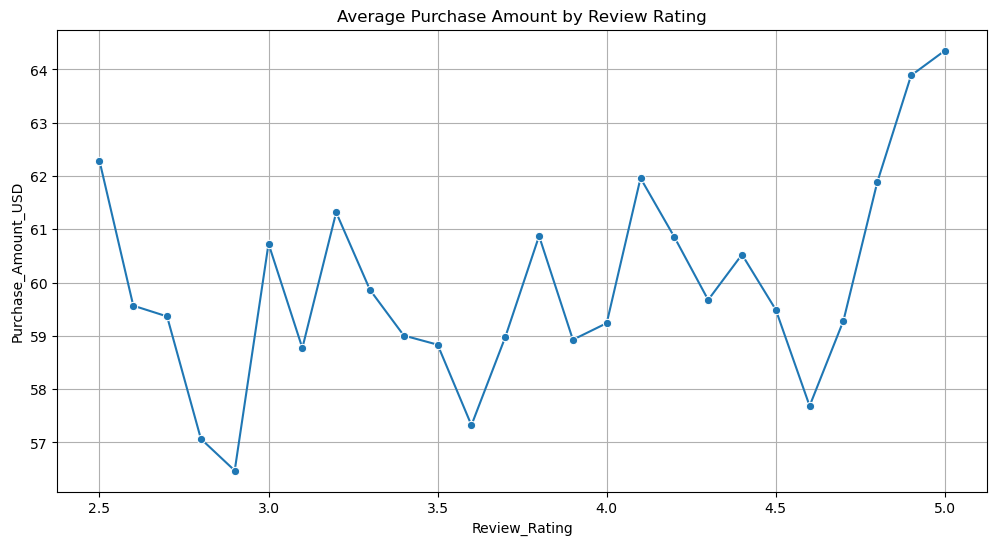

In [ ]:
mean_purchase = df.groupby('Review_Rating')['Purchase_Amount_USD'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_purchase, x='Review_Rating', y='Purchase_Amount_USD', marker='o')
plt.title("Average Purchase Amount by Review Rating")
plt.grid(True)
plt.show()


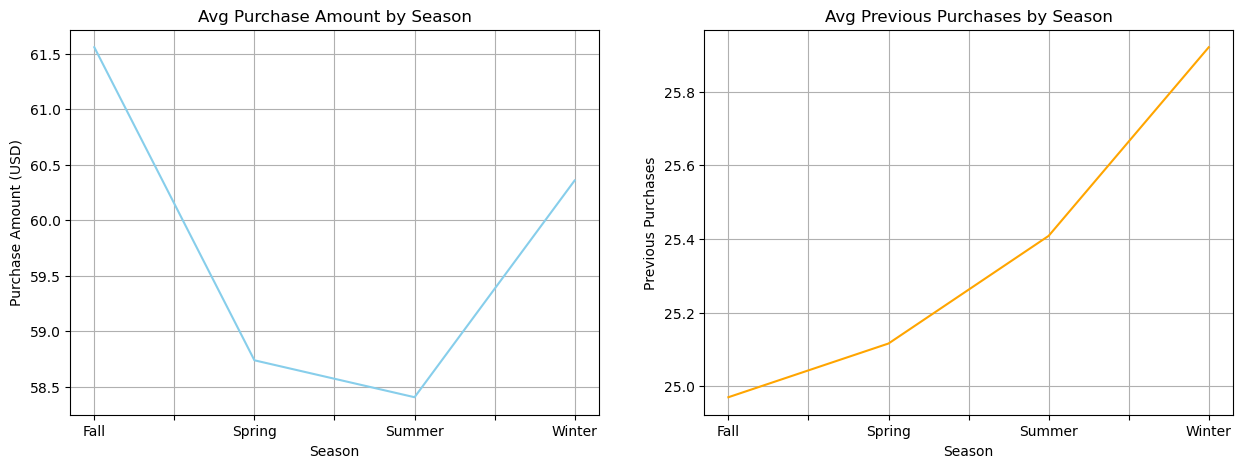

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df.groupby('Season')['Purchase_Amount_USD'].mean().plot(kind='line', ax=axes[0], color='skyblue')
axes[0].set_title('Avg Purchase Amount by Season')
axes[0].set_ylabel('Purchase Amount (USD)')
axes[0].grid(True)
df.groupby('Season')['Previous_Purchases'].mean().plot(kind='line', ax=axes[1], color='orange')
axes[1].set_title('Avg Previous Purchases by Season')
axes[1].set_ylabel('Previous Purchases')
axes[1].grid(True)


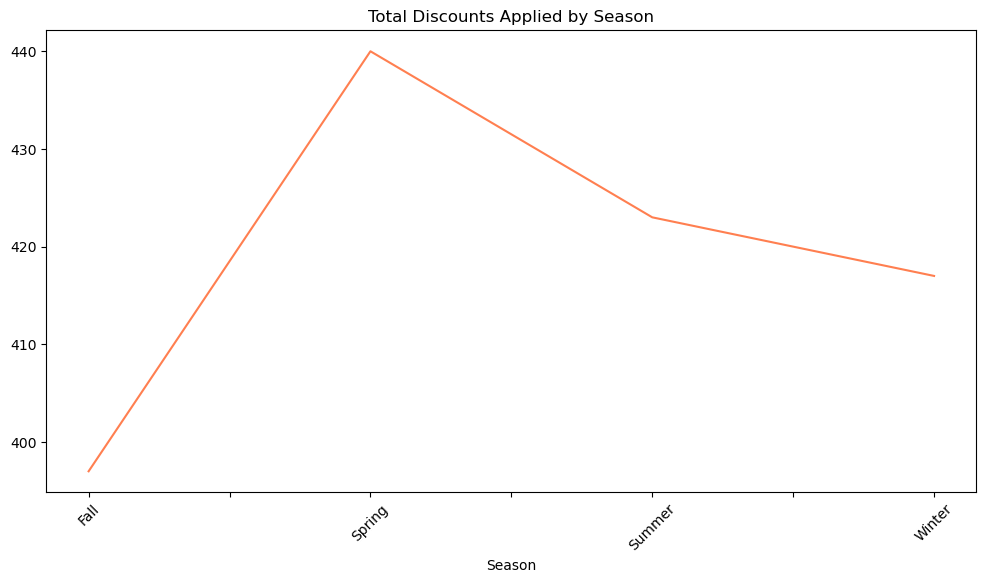

In [ ]:
df.groupby('Season')['Discount_Applied_Num'].sum().plot(kind='line', figsize=(12,6), color='coral')
plt.title('Total Discounts Applied by Season')
plt.xticks(rotation=45)
plt.show()

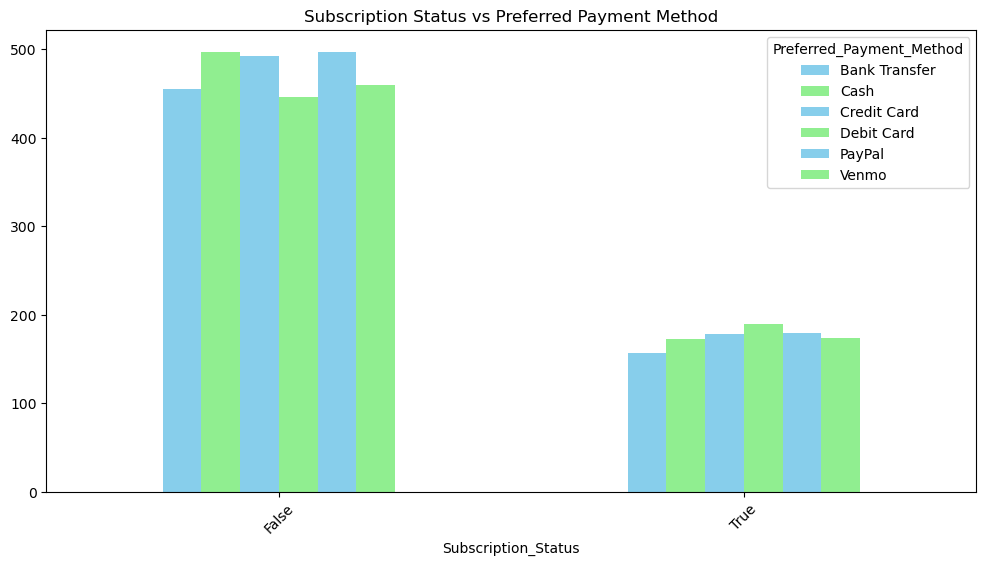

In [ ]:
pd.crosstab(df['Subscription_Status'], df['Preferred_Payment_Method']).plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen'])
plt.title('Subscription Status vs Preferred Payment Method')
plt.xticks(rotation=45)
plt.show()

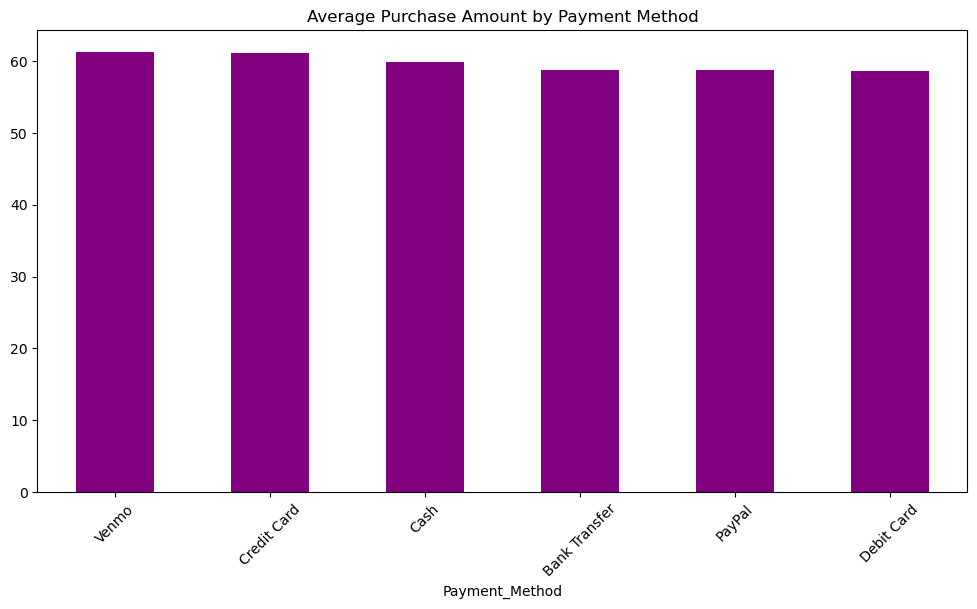

In [ ]:
df.groupby('Payment_Method')['Purchase_Amount_USD'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), color='purple')
plt.title('Average Purchase Amount by Payment Method')
plt.xticks(rotation=45)
plt.show()

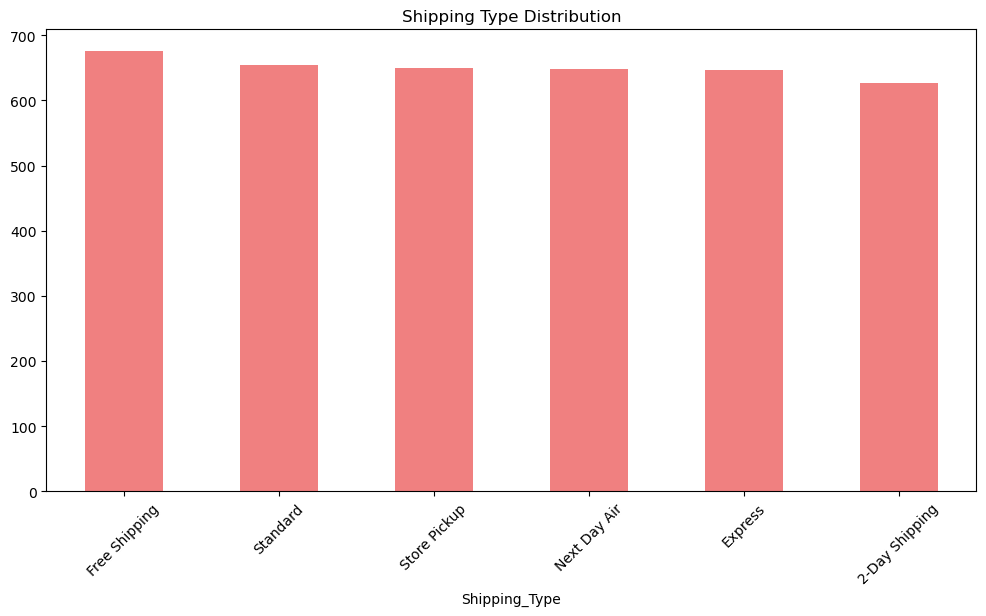

In [ ]:
df['Shipping_Type'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), color='lightcoral')
plt.title('Shipping Type Distribution')
plt.xticks(rotation=45)
plt.show()

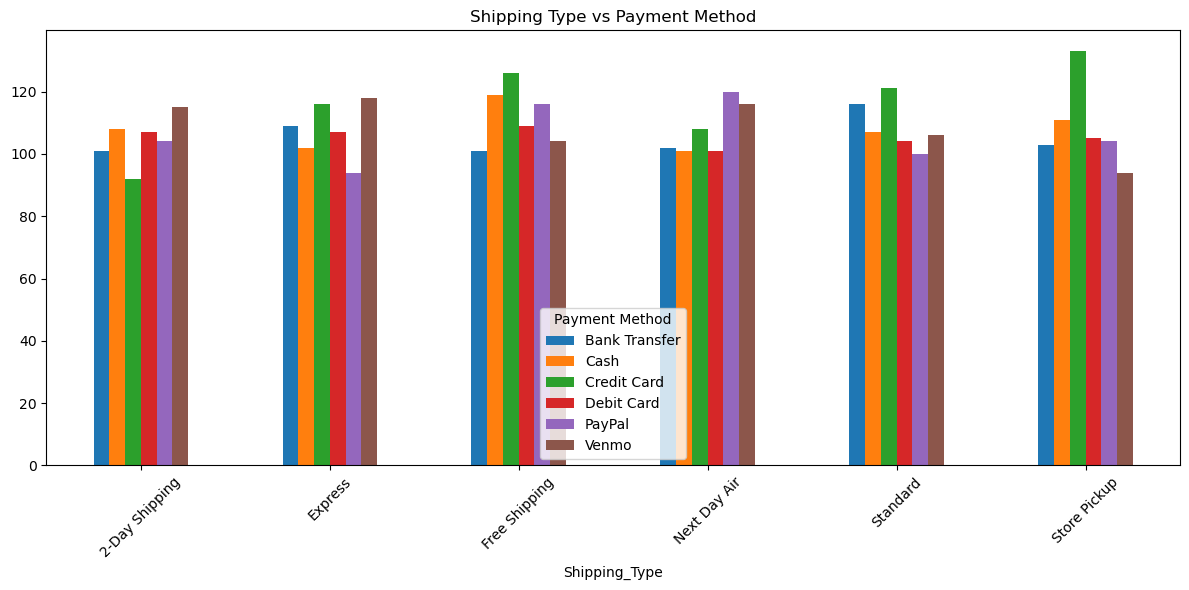

In [ ]:
pd.crosstab(df['Shipping_Type'], df['Payment_Method']).plot(kind='bar', figsize=(12,6))
plt.title('Shipping Type vs Payment Method')
plt.xticks(rotation=45)
plt.legend(title='Payment Method', loc='best')
plt.tight_layout()
plt.show()

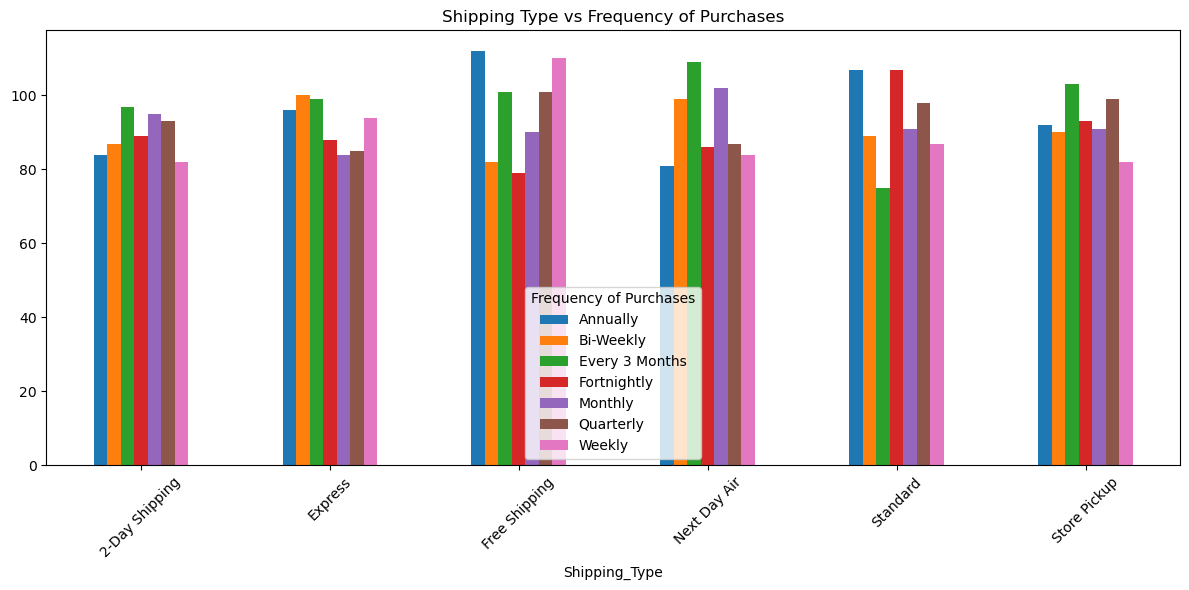

In [ ]:
pd.crosstab(df['Shipping_Type'], df['Frequency_of_Purchases']).plot(kind='bar', figsize=(12,6))
plt.title('Shipping Type vs Frequency of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Frequency of Purchases', loc='best')
plt.tight_layout()
plt.show()

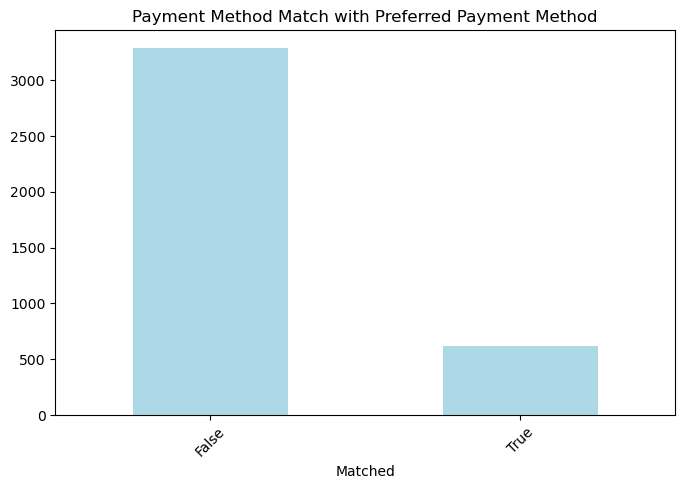

In [ ]:
df['Matched'].value_counts().plot(kind='bar', figsize=(8, 5), color='lightblue')
plt.title('Payment Method Match with Preferred Payment Method')
plt.xticks(rotation=45)
plt.show()

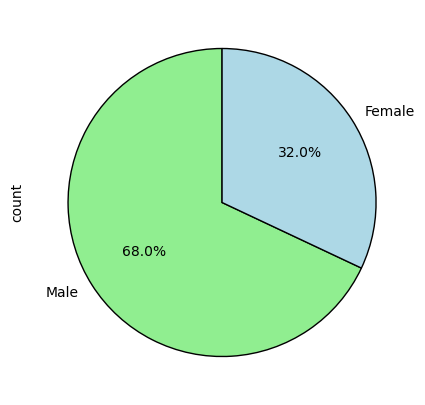

In [ ]:
df['Gender'].value_counts().plot(kind='pie', figsize=(8, 5),colors=['lightgreen', 'lightblue'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.show()

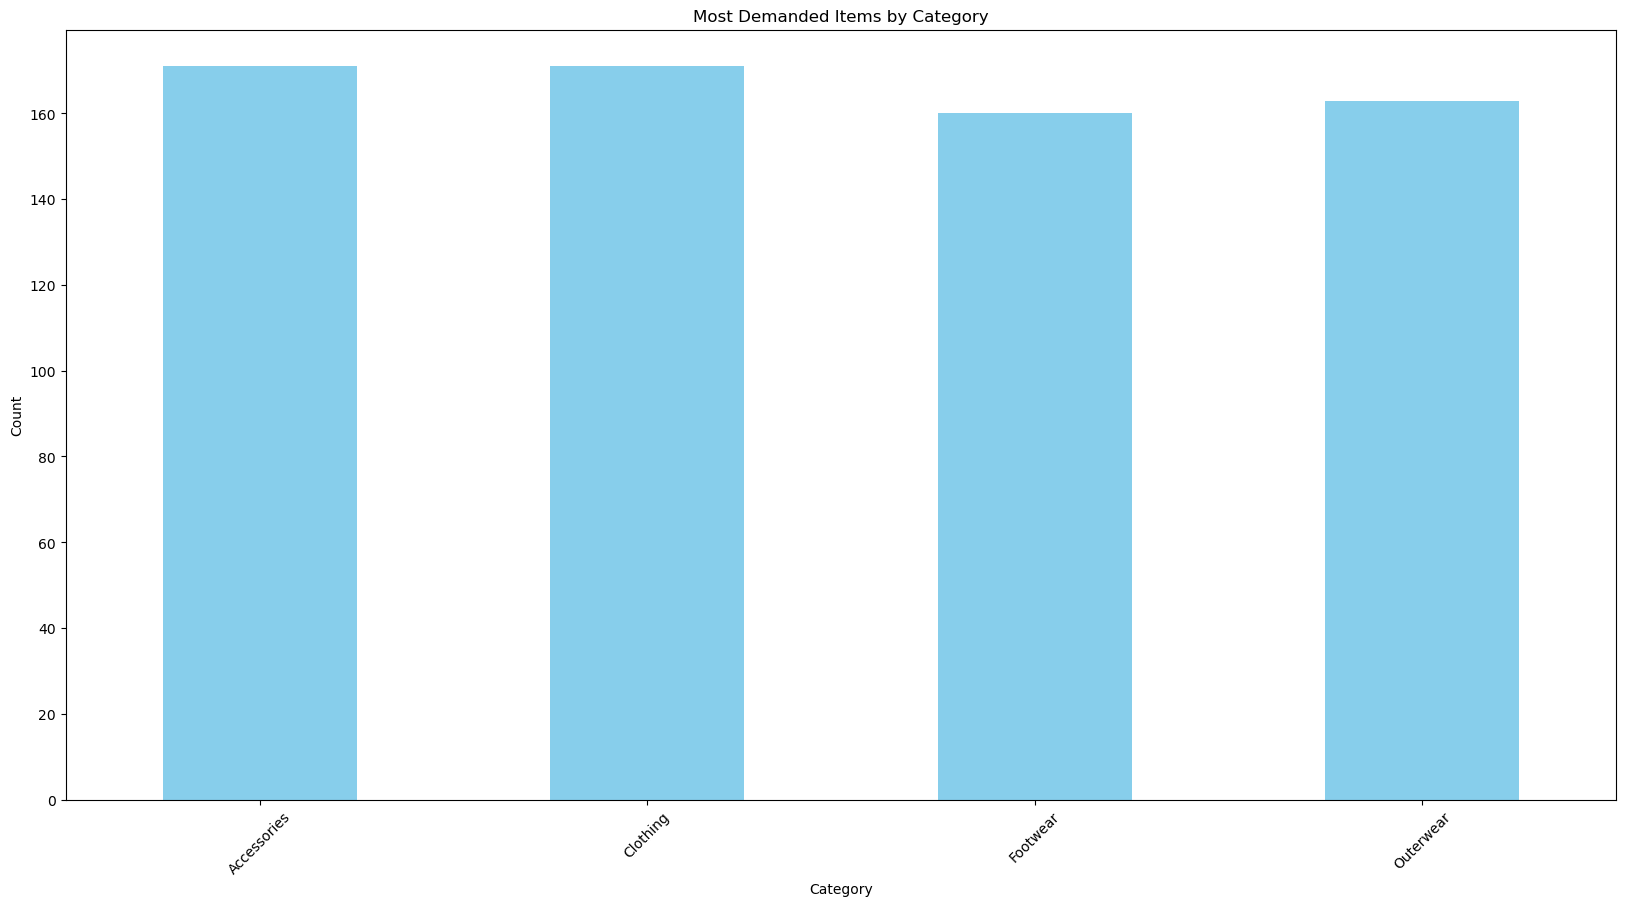

In [ ]:
ct = pd.crosstab(df['Item_Purchased'], df['Category'])
most_demand = ct.idxmax()
most_demand_count = ct.max()
result = pd.DataFrame({
    'Most_Demanded_Item': most_demand,
    'Count': most_demand_count
})

result.plot(kind='bar', y='Count', legend=False, figsize=(20,10), color='skyblue')
plt.title('Most Demanded Items by Category')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

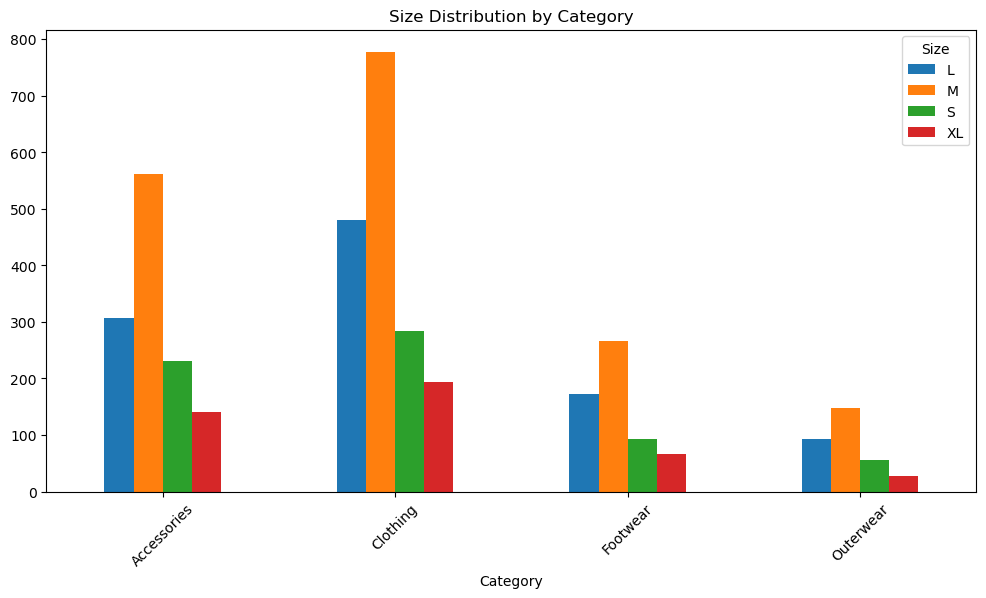

In [ ]:
pd.crosstab(df['Category'], df['Size']).plot(kind='bar', figsize=(12,6))
plt.title('Size Distribution by Category')
plt.xticks(rotation=45)
plt.legend(title='Size', loc='best')
plt.show()

<Axes: ylabel='count'>

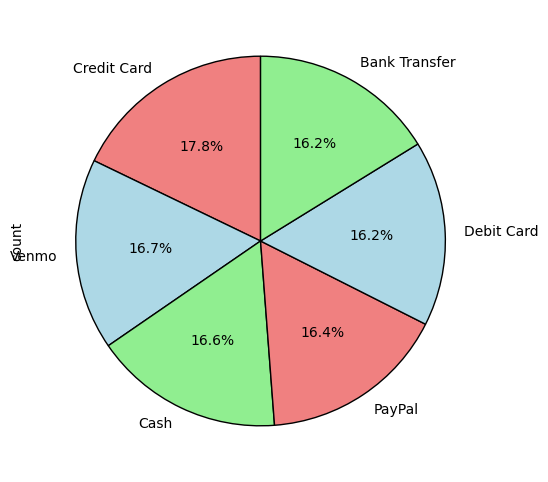

In [137]:
df['Payment_Method'].value_counts().plot(kind='pie', figsize=(12,6), colors=['lightcoral', 'lightblue', 'lightgreen'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'}  )

## Save to excel

In [ ]:
df.to_excel('Shopping_data.xlsx',index=False)